In [1]:
#import packages

In [2]:
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [ ]:
#read dataset

In [3]:
df=pd.read_csv("D:\\data_analysis\\Job_Placement_Data.csv")

In [4]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed


In [5]:
# len(df['ssc_percentage'].unique())

103

In [46]:
label_encoder = preprocessing.LabelEncoder()

In [45]:
#convert string columns to categorical if unique value is less than 5
for i in df.columns:
#     print(len(df[i].unique()))
    if len(df[i].unique())<=5:
        df[i]=label_encoder.fit_transform(df[i])

In [10]:
df

,gender,ssc_percentage,ssc_board,hsc_percentage,hsc_board,hsc_subject,degree_percentage,undergrad_degree,work_experience,emp_test_percentage,specialisation,mba_percent,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [7]:
#check null values
df.isnull().sum()

gender                 0
ssc_percentage         0
ssc_board              0
hsc_percentage         0
hsc_board              0
hsc_subject            0
degree_percentage      0
undergrad_degree       0
work_experience        0
emp_test_percentage    0
specialisation         0
mba_percent            0
status                 0
dtype: int64

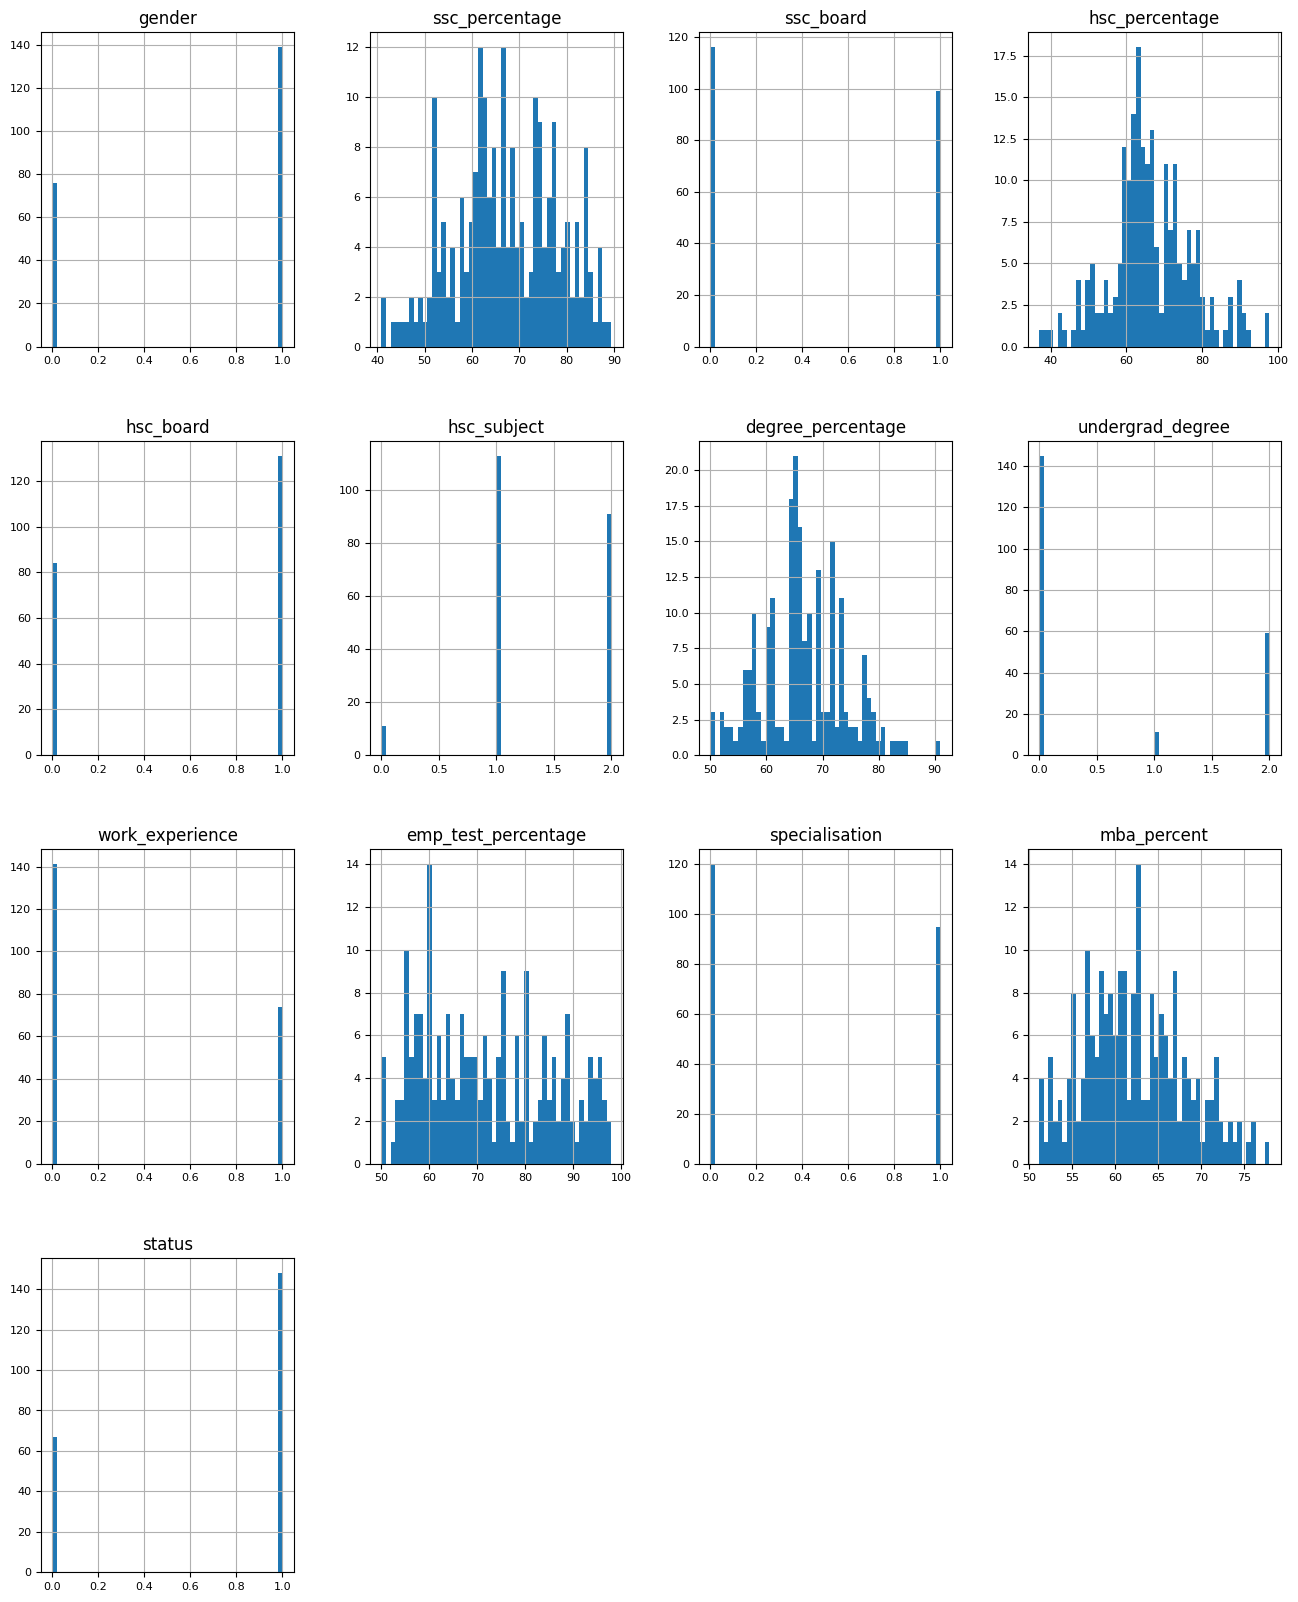

In [11]:
#plot the histogram of each columns
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [15]:
#find thd correlation
df_num_corr = df.corr()['status'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.4].sort_values(ascending=False)

In [14]:
df_num_corr

gender                 0.090670
ssc_percentage         0.607889
ssc_board              0.037297
hsc_percentage         0.491228
hsc_board              0.016945
hsc_subject            0.033442
degree_percentage      0.479861
undergrad_degree      -0.020352
work_experience        0.276060
emp_test_percentage    0.127639
specialisation        -0.250655
mba_percent            0.076922
Name: status, dtype: float64

In [16]:
golden_features_list

ssc_percentage       0.607889
hsc_percentage       0.491228
degree_percentage    0.479861
Name: status, dtype: float64

In [19]:
#split dataset as target and X
li=['ssc_percentage','hsc_percentage','degree_percentage']

In [20]:
X=df[li]

In [21]:
Y=df['status']

In [18]:
df.columns

Index(['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent', 'status'],
      dtype='object')

In [47]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)

In [48]:
#model building
clf = GaussianNB()

In [49]:
#train the model
clf.fit(X_train,y_train)

GaussianNB()

In [50]:
#predict
pred=clf.predict(X_test)

In [51]:
#accuracy score
accuracy_score(y_test,pred)

0.8148148148148148

# training model without correlation

In [52]:
a=['gender', 'ssc_percentage', 'ssc_board', 'hsc_percentage', 'hsc_board',
       'hsc_subject', 'degree_percentage', 'undergrad_degree',
       'work_experience', 'emp_test_percentage', 'specialisation',
       'mba_percent']

In [53]:
X_1=df[a]

In [54]:
Y_1=df['status']

In [55]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, Y_1,random_state=1)

In [56]:
clf_1 = GaussianNB()

In [57]:
clf_1.fit(X_train_1,y_train_1)

GaussianNB()

In [58]:
pred_1=clf_1.predict(X_test_1)

In [61]:
accuracy_score(y_test_1,pred_1)

0.8333333333333334